In [23]:
%cd .\module
%run module_process_data_SW.ipynb
%cd ..

C:\Users\simon\Documents\GitHub\LUCID\Code\module
C:\Users\simon\Documents\GitHub\LUCID\Code


# Frequency vocabulary


In [3]:
conv_dati = pd.read_csv("..\conv_tab.csv")

In [4]:
conv_dati.head()

,id_conv,Unk_1,speaker_A,speaker_B,id_topic,Unk_2,Unk_3,Unk_4,Unk_5,Unnamed: 9,Unnamed: 10
0,2001,Y,1020,1044,303,0,910304,1218,1222,,
1,2005,Y,1169,1133,305,4,910304,1528,1537,,
2,2006,Y,1035,1061,302,2,910305,1228,1236,,
3,2007,Y,1151,1052,302,0,910305,1339,1349,,
4,2008,Y,1176,1057,303,4,910305,1613,1617,,


In [11]:
download_SW_corpus_words = 1 # if assign -0 value it creates the file 
#frequency vocabulary, which contains how many counts, the medianduration for each word of the vocabulary
# if the value is -1 the file will be download

if download_SW_corpus_words == 0:
    path = '..\swb_ms98_transcriptions'
    SW_corpus_words = vocabulary(path, conv_dati)
else:
    SW_corpus_words = pd.read_pickle('..\output\SW_corpus_words.pkl')


In [15]:
SW_corpus_words[SW_corpus_words['word'] == 'yes'].head()

,raw,label,start_time,end_time,word,ID_utterance,ID_conv,ID_speaker,ID,duration
119,sw2001A-ms98-a-0017 73.787750 74.151625 yes,sw2001A-ms98-a-0017,73.787750,74.151625,yes,0017,2001A-ms98-a-0017,A,2001A0017,0.363875
772,sw2001B-ms98-a-0012 64.783250 65.310625 yes,sw2001B-ms98-a-0012,64.783250,65.310625,yes,0012,2001B-ms98-a-0012,B,2001B0012,0.527375
1037,sw2001B-ms98-a-0047 204.208875 204.601375 yes,sw2001B-ms98-a-0047,204.208875,204.601375,yes,0047,2001B-ms98-a-0047,B,2001B0047,0.392500
1193,sw2005A-ms98-a-0003 21.540875 21.980875 yes,sw2005A-ms98-a-0003,21.540875,21.980875,yes,0003,2005A-ms98-a-0003,A,2005A0003,0.440000
1203,sw2005A-ms98-a-0007 45.271250 45.717125 yes,sw2005A-ms98-a-0007,45.271250,45.717125,yes,0007,2005A-ms98-a-0007,A,2005A0007,0.445875


In [13]:
nan_rows = SW_corpus_words[SW_corpus_words['duration'].isnull()]
nan_rows

,raw,label,start_time,end_time,word,ID_utterance,ID_conv,ID_speaker,ID,duration
4023176,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN


Compute the percentage of no completely pronunced word

In [51]:
word = SW_corpus_words[SW_corpus_words['word'].str.contains('([a-zA-Z]{1})*(\[)[a-zA-Z]*(\])')]
word_to_exclude = ['[silence]', '[noise]', '[laughter]']
word = word[~word['word'].isin(word_to_exclude)]
SW_corpus_words_filtered = SW_corpus_words[~SW_corpus_words['word'].isin(word_to_exclude)]
percentage_word_miss = 100 * (word['word'].count()/SW_corpus_words_filtered['word'].count())
print("\nThe percentage of no completely pronounced words = %.2f"% percentage_word_miss)

c:\users\simon\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


ValueError: incomplete format

In [22]:
download_frequency_vocabulary = 1 # if assign -0 value it creates the file 
#frequency vocabulary, which contains how many counts, the medianduration for each word of the vocabulary
# if the value is -1 the file will be download

if download_frequency_vocabulary == 0:
    frequency_voc = frequency_median(SW_corpus_words)
else:
    frequency_voc = pd.read_pickle('..\output\Frequency_vocabulary.pkl')

In [20]:
frequency_voc.head()

,counts,word,median_duration
word,,,
[silence],919155,[silence],0.450000
i,117975,i,0.107125
and,108646,and,0.170000
the,97075,the,0.080000
you,81032,you,0.110000


In [52]:
for i in frequency_voc['word']:
    print(i)

[silence]
i
and
the
you
a
to
uh
that
it
of
know
yeah
in
they
have
but
it's
so
we
is
was
like
well
just
[laughter]
um
that's
do
for
think
don't
oh
[noise]
or
on
right
uh-huh
um-hum
what
my
really
not
be
with
are
if
there
one
i'm
all
get
about
out
had
at
as
up
this
when
he
lot
some
then
go
people
because
can
would
mean
good
got
no
kind
now
they're
going
time
i've
more
see
things
them
been
too
from
me
were
how
your
something
much
[vocalized-noise]
guess
little
where
there's
here
okay
she
an
thing
very
our
did
their
i-
other
work
you're
yes
two
years
we're
even
say
way
any
has
those
pretty
them_1
probably
down
could
didn't
back
sure
than
real
want
year
take
into
home
who
over
stuff
put
kids
said
school
by
can't
never
because_1
make
her
which
went
only
these
doing
always
he's
around
big
anything
money
three
actually
maybe
off
nice
him
day
still
we've
used
come
five
most
his
will
long
every
many
getting
different
last
true
bit
sort
care
everything
us
course
first
does
need
same
should
car
al

Kansas
[laughter-what]
Philadelphia
complicated
wore
reunions
potential
agency
sits
how's
onto
birds
quote
culture
hitting
lab
strictly
depend
McDonald's
page
tha[t's]-
skills
Disney
thrown
yards
mention
opera
mayor
fed
dealers
restrictions
grill
outdoor
development
shirts
non
approach
Two
standards
vegetable
di[d]-
goal
electronic
international
hers
following
central
replaced
prisons
Dakota
thick
family's
Michael
explain
divorced
[laughter-just]
frequently
Times
auto
faster
carried
flexible
controls
registered
halfway
convinced
hassle
Minutes
fear
dirt
hung
frustrating
print
candidates
pleasant
part-time
Super
House
mall
knock
mistakes
honestly
engineers
occasion
bothered
campaign
electronics
shrimp
load
France
shower
channels
master
taxed
substitute
litter
literally
exercising
purchased
humid
options
dresses
th[is]-
contribute
Texan
apply
Sears
wound
hospitals
race
ban
relative
dad's
topics
deer
dumb
girlfriend
philosophy
listened
grab
Rhode
ozone
goods
Twenty
affects
motivated
drive

roughing
interestingly
skunk
[laughter-uh-huh]
Paul
proportion
Hunt
Hospital
weak
useless
Thirty
figuring
keys
chili
guidelines
Beatles
appear
c[an't]-
subdivision
latex
greens
Clarion
shepherd
stationed
gather
Radio
supplies
stationary
painful
search
righ[t]-
circle
EDS
freon
establish
injury
matters
disgusting
bolts
threatening
arthritis
air-conditioning
abortion
trading
advertisements
polls
dropping
assault
acts
owning
hike
minivan
niece
Murphy
narrow
envelope
portable
span
dryer
enemy
rebuilt
Pacific
heavier
elect
yell
tracks
hip
PCs
transit
refused
solved
hat
torn
annoying
driveway
Chevrolet
[laughter-would]
wrestling
tub
hysterical
adventure
pro[bably]-
Sam's
horrendous
indoors
Celtics
relief
y[ou're]-
signal
Reports
Richard
emotionally
Country
feasible
Galveston
coaching
selecting
boots
counties
swear
wok
[laughter-can't]
Malaysia
formed
knife
marks
wave
rake
Johnny
backseat
pink
backpack
seek
crawfish
backing
lobby
Jazz
participation
deduct
Tarpley
bricks
lasts
temperatures
Tex

quantities
a[fter]-
rents
specials
[laughter-talking]
terrified
forgetting
suggestions
drafted
exploration
suicide
Fear
sociology
Fatal
accommodate
fuse
explains
society's
unload
mate
cornstarch
receipt
lasting
societies
experimenting
motel
airlines
Nelson
stoves
DFW
Northwest
magic
max
climbing
independently
ponds
dozens
ne[ver]-
sticky
packaging
closets
n[ice]-
rehabilitate
Boeing
maintaining
peanut
assumption
Anthony
time's
climates
organic
boil
ankles
qualities
polyester
thirds
Miata
Susan
recreational
cleanliness
ideally
Iraqis
Your
existence
click
kit
valve
lengths
Hewlett
aids
scope
scrap
scrape
Jeopardy
dads
la[st]-
output
Roseanne
Hispanics
d[idn't]-
d'oeuvres
finals
mediocre
stitching
Considered
Taco
buffet
buried
translate
hi[s]-
scuba
fi[ve]-
Iraqi
af[ter]-
Telecom
movements
paranoid
International
sedan
bud
Book
weightlessness
great-grandfather
greenhouse
India
upsetting
Rolling
e[specially]-
reward
[laughter-even]
Hot
leaks
This
feminine
Comp
buyer
Avenue
deeper
branches
a

pr[obably]-
technique
stiffer
adequately
Fried
treatments
ignored
sliced
whereabouts
clerical
warming
donations
Kmart
skilled
Tina
CEO
financed
deposits
graphs
sided
screams
Area
Hitler
halls
appreciation
analyst
Stairmaster
Kiss
[laughter-end]
appraised
visitors
circulation
Cities
commentary
indirectly
halibut
racket
Blacks
approached
trail
Station
amusement
resolution
Tigon
participants
consensus
converter
restricting
teens
Asimov
scoop
teeny
windshield
bosses
[laughter-her]
measured
daffodils
an[other]-
ceramics
rationalized
hallway
adolescents
Ellen
reject
Baghdad
coastline
lawsuit
lane
crickets
snows
Laura
disappeared
printing
buffer
speakers
widow
Dune
obedience
Amy
lips
public's
Edward
rockets
lord
Walker
rocking
tags
Act
Isuzu
supporter
hog
[laughter-tell]
generic
encourages
hears
hearings
representing
Carson
updates
Madison
buddies
representatives
recruiting
Le
tabs
wo[rk]-
con
oriental
unacceptable
opinionated
Warren
Carrollton
ev[erybody]-
evaluated
budget's
rec
interpretati

pursued
SPCA
cured
debris
scenic
spaced
misdemeanor
calcium
Bryan
categorize
sti[ll]-
satire
s[omeone]-
Wichita
literary
calculation
[laughter-trouble]
Beijing
ritual
ca[tch]-
Windows
rustic
Funniest
synopsis
prohibit
[laughter-husband]
[laughter-type]
SC
gallery
Zone
catered
escalated
terrier
Suzuki
receivers
literacy
raking
establishing
ramps
cei[ling]-
Gilmore
ribbon
Salisbury
swings
swinging
se[t]-
fi[nd]-
mugged
Sundance
fast-food
fro[m]-
Well
Sandinistas
heaters
stereos
Dustin
pulse
rally
orchards
water's
debated
withholding
Suns
hedge
p[erson]-
risky
fi[fty]-
creeping
gripes
progressing
t[rue]-
prohibited
helpless
patent
tension
purebreds
TAs
papering
Craig
E-mail
timber
seams
creature
About
curly
creatures
paddle
felons
Craftsman
equate
worded
[laughter-wasn't]
epidemic
Wright
Works
[laughter-weather]
Hart
fuss
fusion
Harry
gruesome
creativity
phasing
winners
environments
cave
witnessed
[laughter-watch]
wor[ked]-
t[ake]-
Board
Tahoe
fencing
browns
Catherine
na[me]-
composers
s[

tailgate
geographical
supplier
fouled
supplements
freaks
pyramid
complexity
Buechele
Wet
month's
monstrous
ta[ken]-
swept
Danger
watchers
Weekend
putty
sweaty
tab
monoxide
Darkness
Web
complains
gel
frenzy
Wayne's
sustained
[laughter-both]
Delco
goof
Bonneville
Tempe
comforts
str[ange]-
[laughter-food]
fiance's
comforter
Dinosaurs
pronounced
rage
tenant
tenants
Tawakoni
prompt
[laughter-gave]
warehouses
Taste
confession
pawnshop
CPA's
Temple
[laughter-fine]
groove
fif[teen]-
televise
racking
televised
[laughter-experience]
strategies
s[eem]-
[laughter-fact]
straps
strap
CMU
fighter
movable
strangled
strangle
Teti
Books
s[elect]-
Diner's
radar
fertilizers
rainbow
proponent
TA
Szechuan
Syrian
feathers
stifling
Syracuse
Sylvester
rubbery
stickers
progressively
Supra
Daily
mug
s[erious]-
manufactures
[laughter-instead]
[laughter-interested]
fastest
Blow
stepper
[laughter-his]
feeder
CPU
stint
rubs
[laughter-grass]
Tai
Tad
grouper
manuscripts
[laughter-guns]
T[exas]-
stocked
T[I]-
[laughter

cults
culture's
petunias
curing
occupies
pharmaceutical
pharmacy
phased
curl
curling
curr[ent]-
curricular
lever
cursed
rhetoric
lev[el]-
curtail
rewrite
lethargic
cruising
pet's
retested
linen
livable
credible
ripping
litigious
creep
creepy
crewed
crewel
crews
rioting
crime's
lions
lining
medi[cal]-
oddball
cruelty
critically
criticism
pertaining
limping
crock
pervert
rightly
pessimism
crossword
occupying
rigged
pest
crucial
occupy
rewiring
custard
customary
retires
leafy
objectors
retry
megabytes
lea[ve]-
le[ss]-
de[gree]-
de[pends]-
retreat
dea[l]-
dea[th]-
deadline
deadlocked
mellowed
objecting
lessen
physiology
pi[ck]-
obese
ob[vious]-
melodramatic
law's
debacle
debatable
launching
debtor
dec[ide]-
decay
deceiving
pickings
partitions
dashboard
obligatory
photos
obtain
cutest
cutesy
cutoff
lentils
revolving
revolves
lentil
revolved
revolve
revolutions
revoked
revival
revert
philosophically
revealing
d[rive]-
reveal
legged
legend
daddies
obsession
observations
outgrew
oboe
danced
da

tropicals
fragrance
surpassed
trophies
Nathan
Nathaniel
Sunday's
indian
[hem/hormones]
poss[ible]-
quail
surrendering
franc
growl
incremental
quadriceps
quack
sw[eater]-
freezers
swallowed
Sudan
possum
Nicholas
incontinent
Nichols
swallowing
freons
swamped
trims
trimmer
tensions
inconceivable
postcards
[decifit/deficit]
Nigeria
incorporating
Ni[ssan]-
fre[on]-
suspenders
increment
surveyors
tripping
Never
tent's
Newark
incorrigible
grout
Newport
guiding
freaking
sus[pect]-
sushi
suspecting
test[ing]-
suspend
freely
surge
Narragansett
surfing
Mujeres
proj[ect]-
[laughter-Europe]
supp[ort]-
grunts
Sylvan
Musical
Mustang's
inefficiencies
Mutual
ineffective
teriyaki
tru[th]-
Swift
Mytek
supp[ose]-
supplemented
indus[try]-
quandary
forwarded
NATO
TACB
infatuated
quarrel
[laughter-Jerry]
forthright
grudge
infantry
supernatural
infamous
inexperienced
terminating
Moynihan's
inexpensively
grumble
termed
project's
[laughter-Friday]
[laughter-Ford]
troy
indulge
Sunnyvale
surcharge
N[ational]-
pos

Leesburg
unevenness
Lego
jeopardy
Legos
jeopardize
unending
plausible
jeep
jealousy
jazzed
jaws
play[ers]-
Leaving
play[ing]-
Leonard
unduly
Let's
jamming
Lethal
Levinson
Levy
undone
Lhasa
jacuzzi
jacks
plated
plateau
Lands'
joins
Lanier
ju[nior]-
joys
Laotians
planter
Laser
jour[nal]-
jot
planters
unfold
unfo[rtunately]-
Latino
Laufenberg
Leave
plast[ic]-
Lay
jogged
plastered
unfairness
Le[s]-
Lea
Leader
jo[bs]-
jo[b]-
jigsaw
jigs
Kilmer
kidneys
Khomeini
unsolved
l[ow]-
Jerome
unsupervised
l[osing]-
l[ooking]-
Jets
pilot's
Jew
l[ive]-
l[istening]-
l[ine]-
Jimmy's
Job
pileups
Joe's
l[ess]-
pinion
unsettled
Johns
l[eague]-
l[aying]-
pinned
Johnstown
Joiner
pinpoint
pinpointing
Jenny
la[dy]-
Josey
Jamie's
Jabbar's
lamenting
Jacksons
lake's
unwind
lagging
Jacques
Jaguar
Jaguars
Jake
Jakes
Jamie
lacks
Jeffrey's
Jana
lackadaisical
Janeiro
Janice
laborious
laborers
laborer
Jap
Jap[anese]-
untold
pike
pilaf
unseasonable
unsavory
Kharman
unnatural
Kalachandji's
Kan[sas]-
unorthodox
kingdoms
ki

actua[lly]-
actuality
refrigeration
economist
slavery
slashed
en[velope]-
afterthought
e[ither]-
regulators
dystrophy
agitating
agony
agrarian
dysfunction
rehabilitatable
agreeable
dynamite
air's
rehearse
dwarfed
airless
airport's
airs
dusters
airspace
durn
duress
duration
airy
skies
ag[ainst]-
skits
adventurer
e[liminated]-
slanting
advisable
advising
advisory
advocates
e[xtended]-
slammed
e[xperience]-
regimented
aero[space]-
e[xercise]-
aerospace
e[xcept]-
aff[ects]-
aff[ixing]-
e[verybody's]-
registry
afflicted
affording
afoot
regu[late]-
e[ngine]-
e[nforce]-
educationally
educator
accustom
snarling
reductions
emblem
redundant
embassy
snapping
snapped
embarrass
reef
embargo
embankment
a[partment]-
snafu
snacking
reels
elkhound
a[pproach]-
reenacted
a[sk]-
a[ssistant]-
eligibility
elevens
a[ttached]-
smuggle
a[llow]-
snatched
eel
emiss[ions]-
en[joyed]-
reddish
en[gine]-
snort
a[ccording]-
redesigning
snob
a[cross]-
employee's
rediscover
employ[ee]-
a[dvantage]-
emphasizing
sneaky
a

psychopathic
stumping
scrambles
ra[ised]-
part[ly]-
scraggly
supposing
{moogoo}
quarterbacking
scra[tch]-
reversible
westernize
parse
wh[erever]-
{moneywise}
{mobilely}
reverting
parrot's
reverts
wh[oever]-
scr[ewing]-
reviewers
wha[tever]-
scouters
{misjustice}
ruff
tal[king]-
supposes
wherever's
partic[ipate]-
{nonmeal}
welded
tallies
participant
ra[ndom]-
{nonfixed}
stuffy
reusing
oursel[ves]-
{nonfilm}
welf[are]-
suppose[dly]-
rev[enue]-
ra[mpant]-
revalued
sundaes
qualitative
{nonfeeling}
wenches
revamping
revarnish
tapered
{niokes}
{neato}
psychopath
scrappy
s[crubbing]-
revelation
scrapped
scrapes
scourge
take[s]-
scoured
parents-in-law
suppposed
revolutionized
scoots
tainted
scooter
wheelchairs
wheeled
pu[lled]-
{lovingest}
revolver
scoops
parish
pariah
s[eafood]-
scooper
scou[ts]-
wheeler
revolvers
sconces
tailspin
{litigationist}
ra[ce]-
r[ye]-
qualifying
pu[rpose]-
when'd
r[ushing]-
{landslided}
stup[id]-
revoted
tak[en]-
pu[ll]-
wheelbarrows
revolts
whacking
revising
stunk


quotient
p[rofessionally]-
workbench
p[rocessor]-
purch[ase]-
p[roblems]-
workbook
subordinate
p[ro-choice]-
summa
p[riorities]-
sadly
sailer
p[rior]-
workbooks
p[rices]-
sailboating
saga
safety's
{economicable}
t[elevision]-
subordinates
t[earing]-
p[revalent]-
sadness
purchasers
workman
rubble
t[eachers]-
sa[les]-
t[ap]-
subscribers
sa[vings]-
rubbish
{deregister}
sa[ved]-
p[lain]-
t[alked]-
sa[tisfying]-
would[n't]-
sa[nity]-
rocky
sa[lt]-
p[ile]-
pureed
worshipped
sa[le]-
subsequent
p[ig]-
sa[laries]-
sa[lad]-
p[icking]-
p[icked]-
{depleter}
p[ick]-
subserving
p[ets]-
wowed
p[etroleum]-
subside
worthiness
sabotaged
t[eacher]-
rocketed
sacrosanct
workouts
robust
quorum
p[oint]-
workstations
subs[cribe]-
workup
rockabilly
{do-it-yourselfer}
rocker
worldliness
t[axing]-
subscale
p[lea]-
saccharin
p[layed]-
quiz
sacked
worsen
query
t[ax]-
{disclaimerage}
p[lastics]-
p[lastic]-
worsened
p[lants]-
p[lant]-
p[lanning]-
{descendancy}
p[roposed]-
workaholic
{educationwise}
pac[ifist]-
pacem

repaying
terr[itory]-
ranching
urgency
urged
shopkeeper
prohibits
urethane
steams
repairable
urbanizations
shoplifting
repair's
randomized
piccolo
shopper's
ura[nium]-
prohibitions
urina[lysis]-
urinal
pi[ctures]-
shoo-in
terming
shoe's
shoelace
repapered
use[rs]-
repala
us[ed]-
shootin[gs]-
us'll
shoo[ts]-
repairmen
pi
urines
projec[ts]-
repossessions
proofreading
unwound
sewin[g]-
tele[vision]-
telecom
res[t]-
sexiest
villains
res[ponsibility]-
res[ponding]-
villages
vigorously
vigorous
res[ponded]-
vigor
perpetrate
sh[ade]-
vigilantes
tel[ephone]-
vin[yl]-
tee[nagers]-
vinca
rescuing
rescues
rescued
teena[gers]-
viol[ation]-
res[toration]-
permissions
vineyards
stodgy
severing
tees
vindictively
teetering
teething
vindicated
perpetrating
vigilante
stockier
rerunning
sh[ared]-
videoed
sh[arks]-
sh[e'll]-
pers[onal]-
video's
sh[e's]-
pers[pective]-
vid[eos]-
victims'
sto[ry]-
perse
victimless
victimizing
telescope
perplexing
tokens
stockbroker
telemarketeers
telegrams
reroofing
viewing

Seekers
Seeing
Schwarzenegger's
Schroeder's
Saab's
Schramm
Sandra
Sandlin
Sand
Samsung
Sampson
Salvation
Salvadorians
Salsa
Sally's
Sailor
Saigon
Sagar's
Saddle
Sadaam
Sables
Sable
Saber[hagen]-
Sabbath
Saabs
Sangre
Santa's
Sar[ah]-
Sayers
Scholars
Schnoodle
Schlitterbahn
Schlage
Schipperkes
Scarlet
Scantron
Scandinavian
Saxon
Sarah
Savior
Saved
Sau[di]-
Saturd[ay]-
Satur[day]-
Satu[rday]-
Sarum
Sarandon
Stevens
Stewart's
WWALF
Turin
Turbocraft
Tunisia
Tulley
Tues[day]-
Tue[sday]-
Tudor
Tuckaho
Tubbs
Tu
Tse
Truffle
Tropic
Troopers
Triumph
Tristate
Triscuit
Triple
Trio
Trinidad
Turgeon
Turner's
Sting
Tw[in]-
UVA
UUCP
UTEP
US[SR]-
USSR's
USO
USFL
USC
UPI
UNC
UB
UAB
U2
U-Haul
Tyme
Ty
Twix
Twitty
Twinkies
Trin[ity]-
Trial
Trevino
Trent
Touch
Totally
Tortolla
Toronto's
Tornado
Torito's
Topeka
Topazes
Top[az]-
Tool
Tonkin
Tombstone
Tom's
Toluene
Tollway
Toil
Tobacco
Tire
Tips
Touche
Tour
Tournament
Trade
Treaty
Treatment
Treason
Travolta
Trappers
Transcend
Transatlantic
Train
Tracy'd
Tours
T

Ch[ristmas]-
Ch[inese]-
Ch[ina]-
Ch[icago]-
Ch[asta]-
Certificates
Chopsticks
Chou
Communism's
Clifton
Collection
Colinas
Cole's
Cohill
Cohi[ll]-
Cogburn
Cocktails
Cock[er]-
Cobol
Co[sbys]-
Co[lts]-
Clue
Cloud
Clothing
Closing
Clocks
Clo
Clive
Clipper
Collectors
Collen
Collies
Comics
Communications
Communication
Commonwealths
Committee
Commandments
Commanders
Commander's
Comm[unist]-
Comet
Colombian
Com[puters]-
Com[pany]-
Colter's
Colt
Colorado's
Colora[do]-
Colonies
Colombians
Clinic
Cleo
Chr[istian]-
Clemson
Civi[c]-
Citizens
Citation
Cissy
Circus
Cin[drella]-
Cin[cinnati]-
Churchill's
Chung
Chuckie
Chrys[ler]-
Chry[sler]-
Chronicles
Chriswell
Christine
Christ[mas]-
Chrisostimo
Chri[stian]-
Chr[ysler]-
Clair
Clairon
Clampitt
Classic
Clemente
Clease
Clearly
Clearinghouse
Clean
Cle[ar]-
Claytie
Classics
Classen
Clancy's
Clash
Clarks
Clark's
Claritin
Clarisse
Clarendon
Clara's
Clapton
Di
Diazanon
Carried
Focal
Flyer
Flutie's
Floro
Florida's
Flonies
Flo[rida]-
Flea
Flats
Flashback
Flash

Hamburger
Ham
Halston
Hallmark
Hakeem
Hairspray
Hagman's
Haggerty
Hafford
Hafaia
Hadite
Hackman's
Hackel
Haas's
Ha[mmerstein]-
Ha[ll]-
H[ome]-
Hamlin's
Hammers
Hammerstein's
Harder
Hartford
Harrisburg
Harra
Harpers
Harmonic
Harmon
Harm
Harlins
Happiness
Hamp[shire]-
Hansen
Hannah
Handlers
Handle
Handel
Hand
Hancock
Han[cock]-
Jordans
Joseph
Journal's
Lonesome
Lufkin
Ludlum's
Lud[wig]-
Lucas
Luc
Luau
Lu[bbock]-
Ls
Lowell
Lowe's
Lovett
Lover
Louisi[ana]-
Lou
Losses
Loren
Loop
Lookout
Longview
Luft[hansa]-
Lufthansa
Lufthansa's
Lydian
MC's
MBA's
MADD
M's
Lynyrd
Lyndon
Lynda
Lyle
Lycra
Luis
Lutherans
Lutheran
Lust[bader]-
Lung
Lumina
Lula
Luke
Luise
Longhorn
Lomas
MCP
Lois
Lights
Lightfoot
Lifetime
Lies
Lie
Libreg
Liberties
Liberal
Li[thuania]-
Lexuses
Lewisville's
Lewisburg
Levis
Lever
Leukemia
Letterman's
Let
Lester
Les[lie]-
Lima
Limbaugh
Limits
Littlest
Loggin's
Logan's
Loan
Lo[rd]-
Lo
Llama
Lives
Littleton
Lith[uania]-
Lindburgh
Lister
Lipton
Lipscomb
Lionheart
Lionels
Lion
Linear
Lin

mast
masse[s]-
masse
massage
massacred
masked
mashes
mash
masculine
mas[ter]-
marvel[ous]-
marvel
martinis
marshmallow
mated
materialistic
materialistically
mauled
me[nial]-
me[n's]-
me[gabytes]-
me[diocore]-
me[dia]-
me[chanic]-
maze
may[onnaise]-
maturing
mathematically
mature[s]-
mattered
matte
matriarchies
matriarchial
mating
mathematicians
mathematician
mens
mentors
mirroring
midwife
mind[ed]-
mind's
min[ute]-
min[imal]-
mils
millionaire's
million's
milliliters
milliliter
millennium
mill[ion]-
milkman
militaristic
milit[ary]-
mildly
mil[es]-
mil
mike
migrated
mindedness
minding
mine'd
minist[er]-
miracles
minutia
minu[tes]-
mint
minoring
minori[ties]-
minivan's
ministry
minimized
mine[r]-
minimally
minimalist
minim[um]-
miniatures
mini-blinds
minestrone
miners
mineral
migraine
midterm
mergers
midsized
mexican
metropol[itan]-
metro
methodical
meters
meteorology
meteorologists
meteorologist
meteorological
metaphor
metallic
mess[age]-
meshes
meshed
mesh
mes[quite]-
merry-go-round
mer

childbearing
chide
chickened
chick[en]-
chic
chibbles
chi[ld's]-
chewy
chews
chests
chives
chl[orofluorocarbons]-
chlorinating
cholest[erol]-
christening
choruses
chorus
chording
chord
chorals
choo[sing]-
chomping
choked
chlorination
chocked
chock
cho[lesterol]-
chlorofluorocarbons
chlorofluorocar[bons]-
chlorofluo[rocarbons]-
chlorof[luorocarbons]-
chloro[fluorocarbons]-
clamping
clanking
cock[atoo]-
clouding
co[ncept]-
co[mplete]-
co[mpared]-
co[mmercials]-
co[medy]-
co[lor]-
co[lleges]-
co[ed]-
co-signed
co-processors
co-lead
clustering
clunkers
clunk
clumpy
clump
clued
clowning
clown's
co[nditional]-
co[nnect]-
co[nsiderable]-
co[vers]-
cock
cocaine's
cobblers
cobbler
coastlines
coasting
coaster
coals
co[vered]-
co[nsidered]-
co[sting]-
co[rrect]-
co[nversation]-
co[ntrol]-
co[ntinuance]-
co[nsultant]-
co[nstitution]-
co[nsistently]-
cloudless
clou[d]-
clap
closings
cleanser
clea[r]-
clavichord
claustrophobia
clauses
clause
classifying
classification
classier
classically
classed
cl

court's
couriering
courageous
cour[iering]-
coupled
countryside
countrified
countries'
countr[y]-
countless
counters
counterpart
counterfeit
countenance
countdown
counselees
coverings
covert
cower
cr[uising]-
cramps
cramming
craftsmanship
craftsman
crafted
cradles
cra[p]-
cra[ft]-
cr[owd]-
cowgirls
cr[ossed]-
cr[iminals]-
cr[imes]-
cr[eative]-
cr[eated]-
cr[awling]-
cr[acked]-
coyotes
councils
councilman
coordinator
council's
correlated
corrects
correctness
corrections
corpus
corpora[tion]-
corpor[ate]-
corpo[ration]-
coro[nary]-
cornered
cornea
cornball
cording
cordial
cor[ner]-
copyrighted
copyright
copperhead
copes
correlations
correspondent
correspondents
cottonmouth
counc[il]-
couched
cou[sins]-
cou[ntries]-
cou[nt]-
cottonwoods
cottonwood
cottons
coterie
corresponds
cost[ing]-
cosmonauts
cosmic
cos[ts]-
corrup[tion]-
corrosion
corrode
corroborated
dashes
dashing
daugh[ter]-
differ[ence]-
dinner's
dings
ding
diner
dimpled
dimmers
diminishes
diminish
dimensioned
dimensional
diluted


Fraction of the vocabulary covered by 40 word = 0.37, excluding ['[silence]'] 


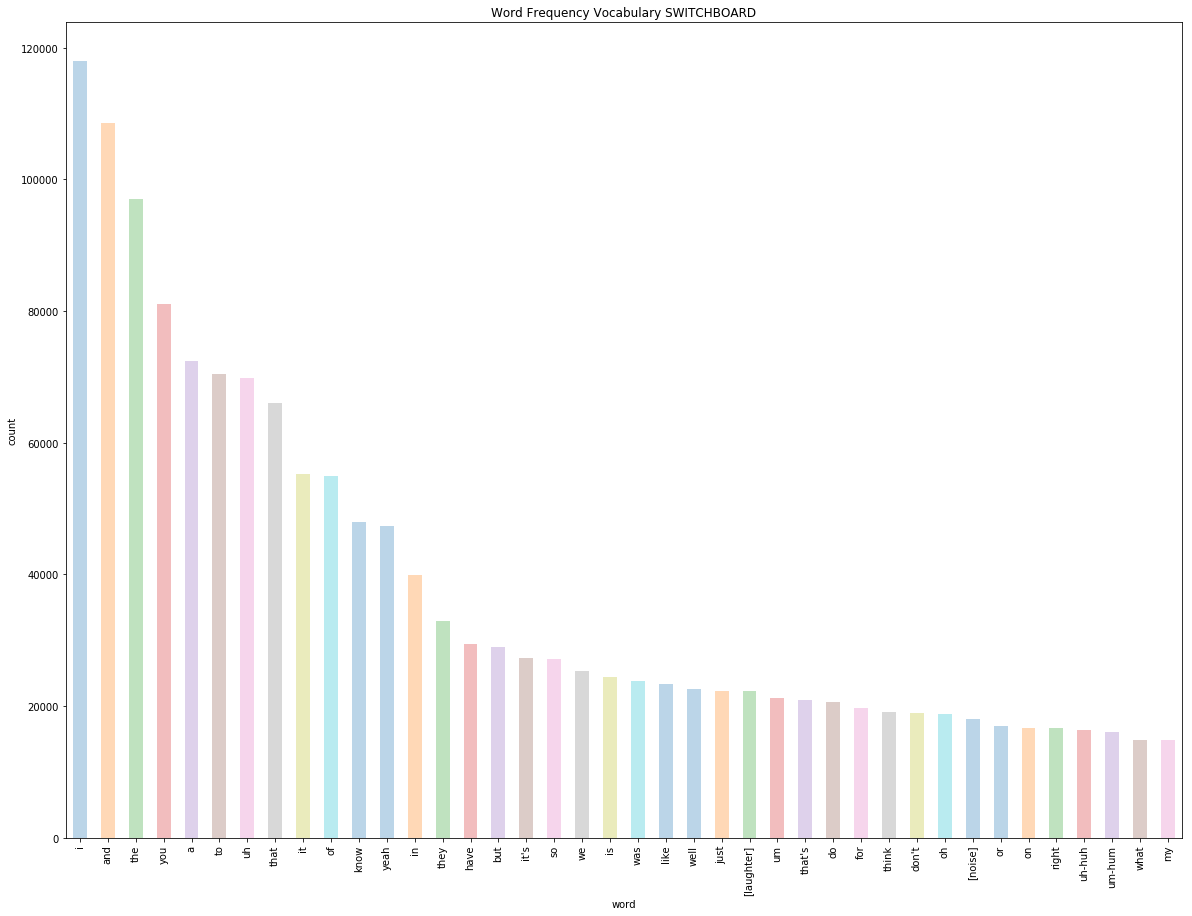

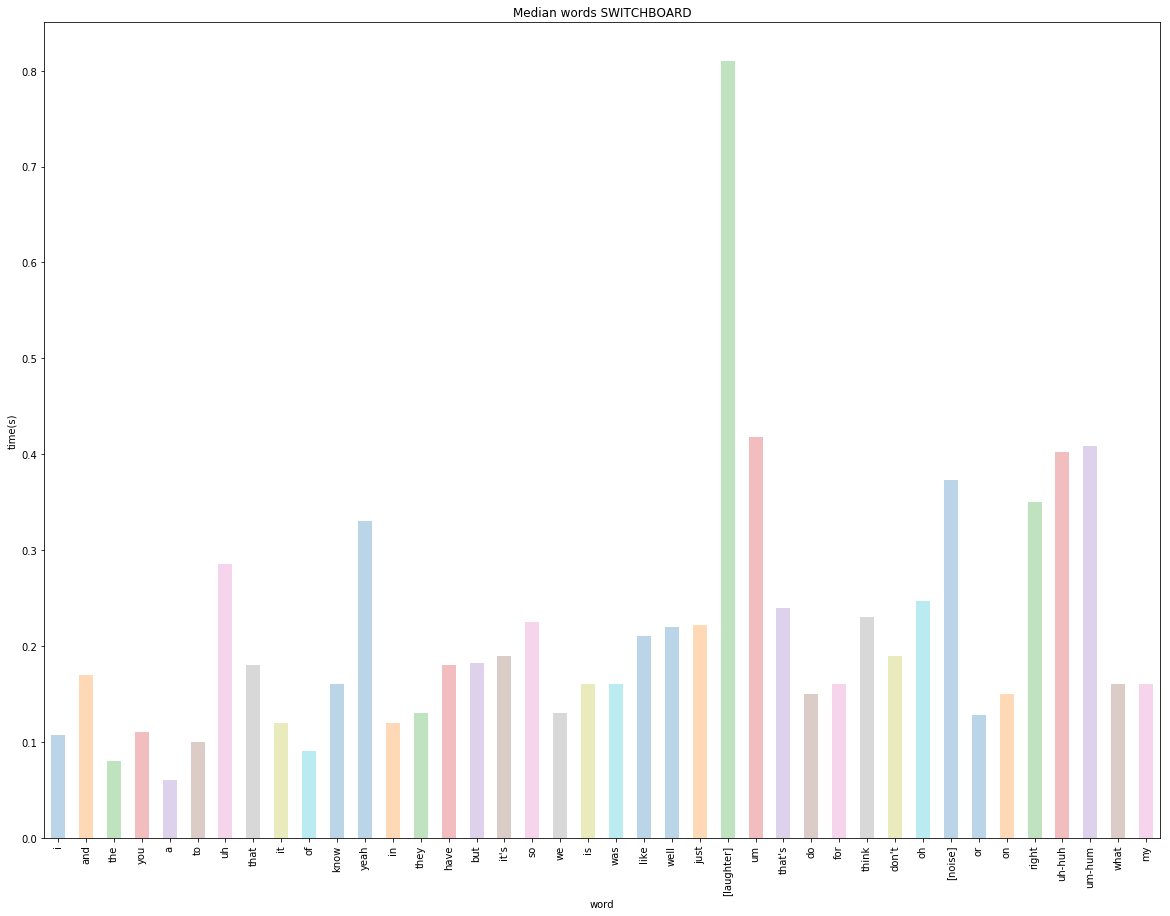

In [24]:
#example of the use for the function "frequency_analysis"
frequency_voc = frequency_voc
N_min_occurences = None
word_to_exclude = ['[silence]']
first_n_word = 40


[frequency_filter, perc_vocabulary] = frequency_word_analysis(frequency_voc, N_min_occurences, word_to_exclude, first_n_word)
#['[silence]\n']

In [45]:
#X_0 = pd.read_pickle('..\output\X_0.pkl')
#X_0[X_0['ID'] == '2005A0041']

In [44]:
# creating several dataframe that will be saved punctually in the directory named "output". 
word_to_exclude = []
n = 1
Number_of_row_per_file = 10000
N_directory = 20

startTime= datetime.now()

indices = divide_interval_data(data, Number_of_row_per_file) # divide the intervals using the function divide_interval_data

# compute the function processing_data for each interval

file_path = '..\\output\\X' + str(N_directory) + '\\'
directory = os.path.dirname(file_path)

if not os.path.exists(directory):
    os.makedirs(directory)

progress = (1/len(indices))
for i in range(len(indices)-1):
    X = processing_data(frequency_voc, data[indices[i] : indices[i+1]], word_to_exclude, n)
    name_file = '..\output\X' + str(N_directory) + '\X_' + str(i) + '.pkl'
    X.to_pickle(name_file)
    progress = progress + (1/len(indices))
    update_progress(progress)
    
# join intervals using the function join_dataframe
dataframe = join_dataframe(indices, N_directory)    
    
timeElapsed=datetime.now()-startTime 
print('Total Time elpased (hh:mm:ss.ms) {}'.format(timeElapsed))    

Percent: [                    ] 0.43956043956043955% 

c:\users\simon\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Percent: [====================] 100% Done...99967%  
Time elpased (hh:mm:ss.ms) 0:00:51.009401
Percent: [====================] 100% Done...70285%   
Percent: [====================] 100% Done...
Time elpased (hh:mm:ss.ms) 0:00:49.997331
Percent: [=                   ] 5.208333333333328%   

KeyboardInterrupt: 

In [15]:
dataframe[0]

,ID,ID_conversation,ID_speaker,ID_utterance,distance_to_end,duration,end_time,lenght_utterance,median_duration,start_time,word
0,2001A0001,2001,A,0001,0,0.977625,0.977625,1,0.450000,0.000000,[silence]
1,2001A0002,2001,A,0002,36,0.237625,1.215250,37,0.450000,0.977625,[silence]
2,2001A0002,2001,A,0002,35,0.509375,1.724625,37,0.330000,1.215250,hi
3,2001A0002,2001,A,0002,34,0.549000,2.273625,37,0.450000,1.724625,[silence]
4,2001A0002,2001,A,0002,33,0.654000,2.927625,37,0.417625,2.273625,um
5,2001A0002,2001,A,0002,32,0.293875,3.221500,37,0.450000,2.927625,[silence]
6,2001A0002,2001,A,0002,31,0.440250,3.661750,37,0.330000,3.221500,yeah
7,2001A0002,2001,A,0002,30,0.295875,3.957625,37,0.160000,3.661750,i'd
8,2001A0002,2001,A,0002,29,0.150000,4.107625,37,0.210000,3.957625,like
9,2001A0002,2001,A,0002,28,0.160000,4.267625,37,0.100000,4.107625,to
